# Teoria

Un electrocardiograma (ECG o EKG) representa visualmente la __actividad electrica__ del corazon respecto del tiempo.

## Como funciona el corazon?

<style>
    .center-image {
        display: block;
        margin-left: auto;
        margin-right: auto;
        width: 500px;
    }
</style>

<img src="https://raw.githubusercontent.com/alex20022000/Procesamiento_de_seniales_ECG/master/partes-del-corazon.jpg" alt="Partes del corazon" class="center-image">



Las arterias y las venas son quienes comunican el corazon con el resto del sistema circulatorio. Las venas llevan sangre al corazon y las arterias la expulsan.  
Las valvulas del corazon controlan las direccion del flujo del sangre.

La sangre con poco contenido de oxigeno entra por las venas cava superior e inferior. Entra a la auricula derecha y es bombeada hacia el ventriculo derecho, que a su vez, bombea la sangre a los pulmones.  
Los pulmones le suministran oxigeno a la sangre y la devuelven a traves de las venas coloreadas en rojo. Dicha sangre ingresa a la auricula izquierda y es bombeada hacia el ventriculo izquierdo.  
Una vez alli, el ventriculo izquierdo genera la presion necesaria para enviar la sangre a la parte inferior y superior del cuerpo.  
[Ver video](https://www.youtube.com/watch?v=ZucF5411jF4)



## Latidos


lup-DUP! lup-DUP! lup-DUP!  
La contraccion de las auriculas y ventriculo es lo que llamamos latidos.  
Cuando las auriculas bombean hacia los ventriculos, las valvulas ubicadas entre ambos, se cierran a modo de valvula anti-retorno __[lup]__  
Después de que los ventrículos se contraen para bombear la sangre fuera del corazón, las válvulas aórtica y pulmonar se cierran y hacen el sonido __[DUP]__.

## Frecuencia cardiaca

El pulso o frecuencia cardiaca se mide el bips o latidos por minuto siendo los siguientes algunos parametros de referencia:

|   Estado de actividad   |   Frecuencia cardíaca (bpm)   |
|-------------------------|-------------------------------|
|         Sueño           |           40-60               |
|         Reposo          |           60-100              |
|        Descanso         |           50-70               |
|        Caminata         |           70-100              |
|       Ejercicio         |          100-180              |
|         Correr          |          120-160              |


## Actividad electrica

Las señales eléctricas producen la contracción de los músculos. 

Con cada latido, una señal eléctrica recorre el corazón desde la parte superior hasta la inferior. En su recorrido, la señal hace que el corazón se contraiga y bombee sangre. El proceso de los latidos incluye los siguientes pasos.

1. La señal comienza en un grupo de células, llamadas células de marcapasos, ubicadas en el nodo sinoauricular (SA) en la aurícula derecha.
2. La señal eléctrica recorre las aurículas y hace que bombeen sangre hacia los ventrículos.
3. La señal eléctrica luego pasa a un grupo de células de marcapasos llamadas nodo auriculoventricular (AV), que se encuentra entre las aurículas y los ventrículos. Aquí la señal se vuelve ligeramente más lenta y da tiempo a los ventrículos a llenarse de sangre.
4. El nodo AV envía otra señal que recorre las paredes de los ventrículos y provoca su contracción y el bombeo de sangre fuera del corazón.
5. Los ventrículos se relajan y el proceso de latido empieza de nuevo en el nodo SA.

## Electrocardiograma

<style>
    .center-image {
        display: block;
        margin-left: auto;
        margin-right: auto;
        width: 800px;
    }
</style>

<img src="https://raw.githubusercontent.com/alex20022000/Procesamiento_de_seniales_ECG/master/Partes%20del%20ECG.jpg" alt="Partes del corazon" class="center-image">

# Introduccion

La idea del proyecto consiste en:
- Graficar una señal de electrocardiograma
- Identificar frecuencias reelevantes
- Diseñar y aplicar un filtro a la señal
- identificar zonas y partes de la señal
- Compararla con una señal de un ECG de una persona con arritmia

# Proyecto

In [1]:
%pip install matplotlib
%pip install pandas
% pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%` not found.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

15000
15000


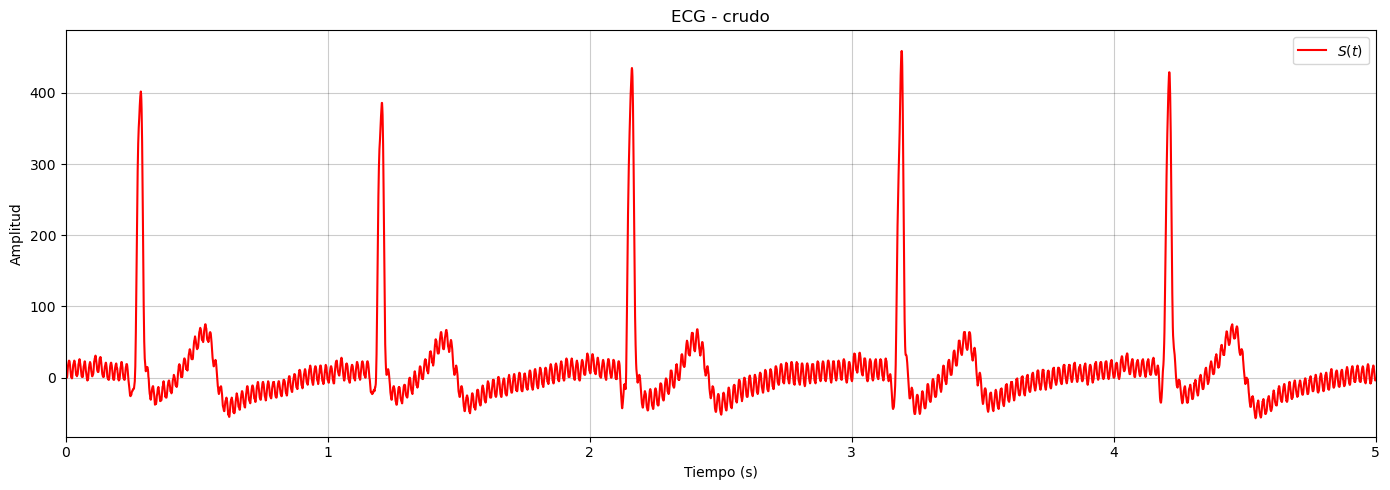

In [3]:
%matplotlib inline

# Leer los datos desde la URL y limpiar el DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt', sep='\t')
df = df.drop([0, 1, 2]).reset_index(drop=True)

# Asignar un nombre a la columna
df.columns = ['ecg']

# Convertir la columna "ecg" a valores numéricos
df['ecg'] = pd.to_numeric(df['ecg'])

# Extraer los valores de la columna "ecg"
ecg = df['ecg'].values - df.values[0]

# Definir la frecuencia de muestreo y el tiempo
fs = 1000
"""
1000 muestras ---> 1 seg
len(ecg)      ---> time
"""
time = len(ecg)/fs
print(len(ecg))
t = np.arange(0, time, 1/fs)
print(len(t))


# Mostrar el gráfico
plt.figure(figsize = (14,5))
plt.title("ECG - crudo")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.plot(t, ecg, color = 'red', label = '$S(t)$')
plt.grid(color = "black", alpha = 0.2)
plt.xlim(0,5)
plt.tight_layout()
plt.legend()
plt.show()



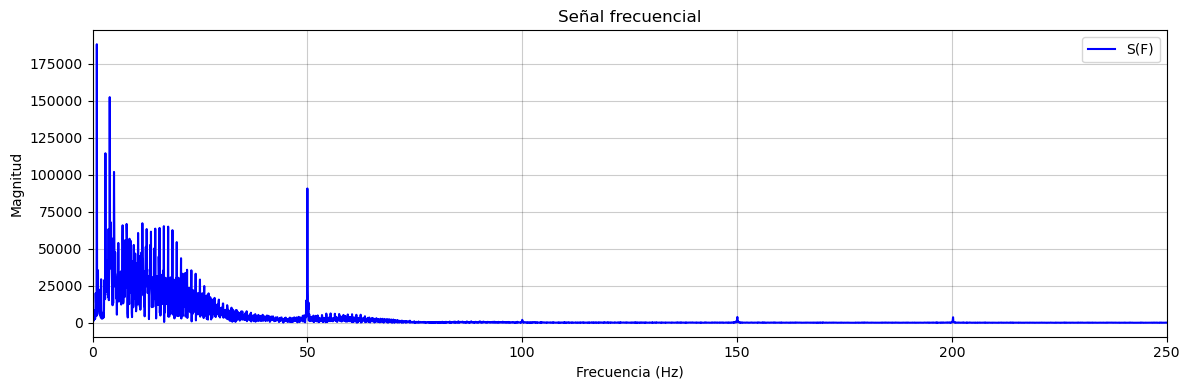

In [4]:
# %matplotlib widget
# Aplicar la transformada de Fourier
X = np.fft.fft(ecg)

# Obtener la magnitud del espectro de frecuencia
mag_X = np.abs(X)


freq = np.linspace(0, fs, len(ecg))
#freq = np.fft.fftfreq(len(ecg), 1 / fs)

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 4))
plt.title("Señal frecuencial")
plt.plot(freq, abs(mag_X), color='blue', label='S(F)')
plt.grid(color = "black", alpha = 0.2)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, fs/4)
plt.tight_layout()
plt.legend()
plt.show()


Es curioso apreciar que casualmente se ve un pico en la frecuencia de 50 Hz que suele ser la frecuencia de corriente electrica de la red. Luego se puede apreciar bastente ruido.  
Ahora, para aplicar un filtro debemos saber que frecuencias son razonables para un ecg